# <b><u> Compte Rendu du TP de Réseaux de Capteurs </u></b>  
  
STEKELOROM Kevin  
DJEMAI Abdelaziz  
  
Electronique de Systèmes Embarqués | 4ème année  
INSA Hauts-de-France

In [143]:
#-------IMPORTATION DES BIBLIOTHEQUES-------#

from math import *
import numpy as np
import matplotlib.pyplot as plt

Commençons par programmer l'équation 1 du TP permettant de calculer le coût énergétique monosaut entre 2 noeuds

In [144]:
def Emono(beta,distance,gamma):
    # Emono permet de calculer le coût énergétique d'une communication monosaut
    # Entrée : beta en fJ/m^gamma, distance en m et gamma>1
    # Sortie : Retourne la coût énergétique Emono
    b = beta
    d = distance
    g = gamma
    Emono = b*d**g
    return Emono

Nous allons maintenant tester la fonction Emono afin de retrouver la valeur donnée dans le sujet (à savoir Emono=1.25 nJ/bit avec gamma=4 ; Bêta=0.2 fJ/(m^gamma) et d=50m)

In [145]:
print(Emono(0.2,50,4)) # NB : femto = 10^15 et nano = 10^9. Ainsi le résultat que l'on devrait obtenir est 1250000

1250000.0


Maintenant que la fonction ci-dessus a été programmée puis testée. Nous allons définir les 10 noeuds (avec leurs coordonnées en 3D) de manière indépendante puis nous les intégrerons à une matrice N afin de pouvoir utiliser leurs coordonnées de manière plus simple.

In [146]:
# Définition des 10 noeuds
n1 = np.array([0,0,0])
n2 = np.array([2,3,1])
n3 = np.array([3,2,0.5])
n4 = np.array([3,4,2.5])
n5 = np.array([3,5,3])
n6 = np.array([2,8,1])
n7 = np.array([4,7,1.5])
n8 = np.array([6,6,3])
n9 = np.array([6,9,1.5])
n10 = np.array([9,9,0.5])

# Définition d'une matrice N regroupant les 10 noeuds
N = np.array([n1,n2,n3,n4,n5,n6,n7,n8,n9,n10])

Cette définition de matrice va nous servir de base dans toute la suite du TP.

Commençons par définir les équations de distances inter noeud.  
Afin de définir cette distance, nous allons tout d'abord définir une liste vide appelée distances afin d'y stocker les distances inter noeuds.  
Chaque sous-matrice de la matrice N est de dimension 3, ainsi les attributs xi, yi et zi vont chacun prendre la valeur de chaque composant de cette sous-matrice.

In [147]:
# Calcul des distances inter noeuds
distances = []  # Liste pour stocker les distances inter noeuds
for i in range(N.shape[0]):
    for j in range(i+1, N.shape[0]):
        # Coordonnées du noeud i
        xi, yi, zi = N[i]

        # Coordonnées du noeud j
        xj, yj, zj = N[j]

        # Calcul de la distance euclidienne
        distance = sqrt((xj - xi)**2 + (yj - yi)**2 + (zj - zi)**2)

        # Ajout de la distance à la liste des distances
        distances.append((i+1, j+1, distance))

print(distances) # Affiche le numéro d'un noeud, puis du suivant et de la distance les séparants
                # sous la forme suivant (1er noeud, 2e noeud, distance séparant les 2 noeuds)


[(1, 2, 3.7416573867739413), (1, 3, 3.640054944640259), (1, 4, 5.5901699437494745), (1, 5, 6.557438524302), (1, 6, 8.306623862918075), (1, 7, 8.200609733428363), (1, 8, 9.0), (1, 9, 10.920164833920778), (1, 10, 12.737739202856996), (2, 3, 1.5), (2, 4, 2.0615528128088303), (2, 5, 3.0), (2, 6, 5.0), (2, 7, 4.5), (2, 8, 5.385164807134504), (2, 9, 7.22841614740048), (2, 10, 9.233092656309694), (3, 4, 2.8284271247461903), (3, 5, 3.905124837953327), (3, 6, 6.103277807866851), (3, 7, 5.196152422706632), (3, 8, 5.5901699437494745), (3, 9, 7.681145747868608), (3, 10, 9.219544457292887), (4, 5, 1.118033988749895), (4, 6, 4.387482193696061), (4, 7, 3.3166247903554), (4, 8, 3.640054944640259), (4, 9, 5.916079783099616), (4, 10, 8.06225774829855), (5, 6, 3.7416573867739413), (5, 7, 2.692582403567252), (5, 8, 3.1622776601683795), (5, 9, 5.220153254455275), (5, 10, 7.632168761236874), (6, 7, 2.29128784747792), (6, 8, 4.898979485566356), (6, 9, 4.153311931459037), (6, 10, 7.088723439378913), (7, 8, 2.

Il nous est également demandé de définir une table de voisinage. Cette table est à définir "selon nos envies et nos préférences". Ainsi nous décidons que pour qu'un noeud soit considéré comme voisin avec un autre, il faut que la distance séparant les 2 noeuds soit au plus égale à 4 mètres.

In [148]:
# Définition de la table de voisinage
voisinage = []

# Définition de la distance seuil (4m)
seuil_distance = 4

# Parcourir la matrice N pour calculer la distance entre chaque paire de noeuds
for i in range(N.shape[0]):
    voisins = []
    for j in range(N.shape[0]):
        if i != j:  # Exclure le noeud lui-même
            distance = np.linalg.norm(N[i] - N[j])  # Calcul de la distance
            if distance <= seuil_distance:  # Condition pour déterminer les voisins
                voisins.append(j)
    voisinage.append(voisins)

# Affichage de la table de voisinage
for i in range(len(voisinage)):
    print("Voisins du noeud n{} : {}".format(i+1, voisinage[i]))


Voisins du noeud n1 : [1, 2]
Voisins du noeud n2 : [0, 2, 3, 4]
Voisins du noeud n3 : [0, 1, 3, 4]
Voisins du noeud n4 : [1, 2, 4, 6, 7]
Voisins du noeud n5 : [1, 2, 3, 5, 6, 7]
Voisins du noeud n6 : [4, 6]
Voisins du noeud n7 : [3, 4, 5, 7, 8]
Voisins du noeud n8 : [3, 4, 6, 8]
Voisins du noeud n9 : [6, 7, 9]
Voisins du noeud n10 : [8]


Maintenant que les noeuds voisins ont été définis, les noeuds peuvent uniquement communiquer avec leur(s) voisin(s). A titre d'exemple, les voisins du noeud 1 "n1" sont les noeuds 2 et 3.

<u>NB:</u> Pour l'affichage des résultats, il est important de noter que Python commence à l'index 0.  
Ainsi lors de l'interprétation de ce qui est affiché par Python (uniquement pour l'affichage des noeuds voisins ci-dessus), les voisins du noeud 1 sont "en réalité" les noeuds 2 et 3 et non les noeuds 1 et 2 comme indiqué ci-dessus.  
Par conséquent, 0 fait référence au noeud 1 -> 9 fait référence au noeud 10.

Ce n'est pas demandé dans le sujet, mais traçons un graphique mettant en évidence chaque noeud et le "lien" entre chaque noeud voisin représentant les distances. Ce graphe aura pour but d'avoir une représentation visuelle de notre problème.

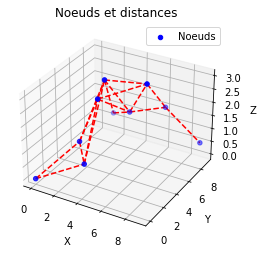

In [149]:
# Création d'une figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Tracer les nœuds
ax.scatter(N[:, 0], N[:, 1], N[:, 2], c='blue', marker='o', label='Noeuds')

# Tracer les distances entre chaque paire de noeuds
for i in range(N.shape[0]):
    for j in range(i+1, N.shape[0]):
        distance = np.linalg.norm(N[i] - N[j])  # Calcul de la distance
        if distance <= seuil_distance:  # Condition pour déterminer les voisins
            ax.plot([N[i, 0], N[j, 0]], [N[i, 1], N[j, 1]], [N[i, 2], N[j, 2]], c='red', linestyle='dashed')

# Paramétrage des axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Noeuds et distances')
ax.legend()

# Afficher le graphique
plt.show()

<b>Maintenant nous avons une représentation visuelle de notre problème.</b>

Il est à présent demandé dans le sujet de définir le chemin le plus court en distance pour pouvoir établir une communication entre les 10 capteurs (en excluant le trajet direct 1 à 10). Ensuite il faudra définir le chemin le plus "vert".  
Pour pouvoir répondre à ces deux questions, il va falloir utiliser les noeuds voisins.

<b>Afin de pouvoir établir le chemin le plus court, nous allons utiliser l'Algorithme de Dijkstra.</b>

Le principe de fonctionnement de cet algorithme est le suivant :  
  
L'algorithme part d'un noeud père et calcule les distances avec les noeuds qui sont à côté de lui. C'est-à-dire que les noeuds sont par défaut définis comme "non visités", ainsi l'algorithme parcourt le "graphe" à la recherche des noeuds non visités et calcule la distance entre les noeuds à la recherche de la plus petite distance.  
Le but est alors de définir un "chemin" de notre point de départ et de parcourir le graphe à notre disposition jusqu'à la fin. Ainsi à chaque fois qu'une plus petite distance entre un noeud et un de ses voisins a été trouvée, le chemin se trace et se modifie sur la distance calculée avec le deuxième voisin est plus petite que celle calculée avec le premier voisin.

L'algorithme prend en entrée un graphe (ici c'est notre table de voisinage), la valeur de notre premier noeud (représentée par 0 en programmation python), la valeur de notre dernier noeud (9) ainsi que la matrice N qui contient les coordonnées de nos noeuds afin de pouvoir calculer les distances.

In [150]:
def dijkstra(voisinage, debut, fin, N):
    # Initialisation
    inf = float('inf')
    distance = [inf] * len(voisinage)
    visite = [False] * len(voisinage)
    precedent = [None] * len(voisinage)
    distance[debut] = 0

    # Boucle principale de l'algorithme de Dijkstra
    for _ in range(len(voisinage)):
        min_distance = inf
        min_index = -1

        # Trouver le noeud non visité avec la distance minimale actuelle
        for i in range(len(voisinage)):
            if not visite[i] and distance[i] < min_distance:
                min_distance = distance[i]
                min_index = i

        # Marquer le noeud actuel comme visité
        visite[min_index] = True

        # Mettre à jour les distances des voisins du noeud actuel
        for i in voisinage[min_index]:
            if not visite[i]:
                dist = np.linalg.norm(N[min_index] - N[i])  # Calcul de la distance entre les noeuds
                alt = distance[min_index] + dist # alt : distance alternative 
                if alt < distance[i]:
                    distance[i] = alt
                    precedent[i] = min_index

    # Reconstituer le chemin le plus court
    chemin = []
    noeud = fin
    while noeud is not None:
        chemin.append(noeud)
        #print(chemin)          # --CECI EST UNE LIGNE DE TEST--
        noeud = precedent[noeud]
    
    chemin.reverse()

    return chemin, distance[fin]

Je vais maintenant expliquer l'éxécution de l'algorithme pas à pas.  

<b><u>Concernant l'initialisation :</u></b>  
Dans un premier temps, nous avons défini:  
 -"inf" qui correspond à une distance infinie entre les différents noeuds.  
 -"distance" correspond aux distances entre tous les noeuds. Puisque l'on ne connait pas les distances entre chaque noeud, elles sont alors initialisées à l'infini (NB: En informatique, elles sont aussi souvent initialisées à -1, qui représente la distance infinie).  
 -"visite" est définie comme étant une matrice qui indique si un noeud a été visité ou non. Initialisée sur False, les valeurs booléennes de la matrice changent lorsqu'un noeud a été visitée.  
 -"precedent" est une liste indiquant tous les noeuds précédents de chaque noeud sur le chemin le plus court. Cette liste est initialisée sur None.  
-"distance[debut]=0" définie la distance entre n1 et lui-même à 0.

<b><u>Concernant la boucle principale :</u></b>  
  <u>NB:</u> Avant de commencer l'explication, l'utilisation de l'underscore "_" signifie que l'on est pas intéressé par une variable en particulier. Ainsi, son utilisation dans la boucle for, signifie que l'on souhaite simplement faire une boucle for et que l'on ne s'intéresse par à une variable en particulier qui "conditionne" cette boucle.  
  
 Dans un premier temps, on initialise la distance minimale "min_distance" et l'index minimal "min_ind" qui serviront à trouver le noeud non visité avec la distance minimale actuelle.  

<u>Première boucle for à l'intérieur de cette boucle principale :</u>  
   L'algorithme parcourt tous les noeuds du graphe (représentés par la liste voisinage) à la recherche des noeuds non visités avec la distance minimale actuelle.  
   Le "if" de cette boucle vérifie si le noeud i n'a pas était visité et si la distance entre le noeud précédent est celui-ci est inférieur à la distance minimale. Si c'est le cas, alors "min_distance" et "min_index" changent.  

<u>Deuxième boucle for à l'intérieur de la boucle principale :</u>  
   L'objectif de cette boucle est de mettre à jour les distances des voisins du noeud actuel.  
   -Le "if not visite[i]" permet de vérifier si le noeud i (voisin du noeud actuel, c'est-à-dire le noeud min_index), n'a pas été visité (en gros, ça regarde si à l'index i il y a une valeur False). Cette vérification permet de s'assurer qu'il n'y a que les voisins non visités qui sont pris en compte par la mise à jour des distances.  
   -"alt" est une distance alternative qui représente la distance qui serait parcourue si l'on décidait de passer par le noeud min_index pour atteindre le noeud i.  
   Ainsi, si cette distance alternative est plus petite que la distance, une nouvelle distance "plus petite" a été trouvée. En d'autres mots, on a trouvé une distance plus petite pour atteindre le noeud i en passant par le noeud actuel min_index.  
   Ce qui a pour conséquence : "precedent[i]=min_index" qui défini le prédecesseur du noeud i est dans ce cas mis à jour pour laisser place au noeud actuel min_index.

<b><u>Concernant la restitution du chemin le plus court :</u></B>  
Nous partons du noeud final et on décompose en remontant au noeud précédent jusqu'à arriver au noeud initial.

In [151]:
debut = 0  # Noeud de départ (n1)
fin = 9  # Noeud d'arrivée (n10)
path, total_distance = dijkstra(voisinage, debut, fin, N)
print("Chemin le plus court : ", path)
print("Distance totale : ", total_distance)

Chemin le plus court :  [0, 1, 3, 6, 8, 9]
Distance totale :  15.110539774852741


D'après l'éxécution de l'Algorithme ci-dessus, le chemin le plus court est le suivant :  
Noeud 1 -> Noeud 2 -> Noeud 4 -> Noeud 7 -> Noeud 9 -> Noeud 10  
  
La distance parcourue dans ce trajet est d'environ 15,11 m.

Maintenant que l'on a défini le trajet le plus court à parcourir pour transmettre une information entre le noeud 1 et le noeud 10. Il faut définir le trajet le plus "Green", c'est-à-dire celui qui le coût énergétique le plus bas.  
L'objectif est alors de comparer si le chemin le plus Green correspond également au chemin le plus court.

<b><u>Déterminons le coût énergétique entre chaque noeud.  
Pour rappel, il ne peut y avoir un coût énergétique qu'entre noeuds voisins.</u></b>

In [152]:
beta=0.2
gamma=4

# Définition d'une matrice vide distanceVois (utile plus tard dans le calcul de Emulti)
distanceVois=[]

# Définition de la matrice de coût énergétique monosaut
cout_energetique = np.zeros((len(voisinage), len(voisinage)))

# Parcourir la matrice de voisins
for i in range(len(voisinage)):
    for j in voisinage[i]:
        
        # Utiliser la distance entre les noeuds voisins comme distance dans l'appel à la fonction Emono
        distanceV = np.linalg.norm(N[i] - N[j])  # Calcul de la distance entre les noeuds voisins
        distanceVois.append(distanceV)

        # Utiliser la fonction Emono pour calculer le coût énergétique monosaut entre les noeuds voisins
        cout_energetique[i][j] = Emono(beta,distanceV,gamma)

# Afficher la matrice de coût énergétique monosaut pour les noeuds voisins uniquement
for i in range(len(voisinage)):
    print("Coût énergétique monosaut entre le noeud n{} et ses voisins :".format(i+1))
    for j in voisinage[i]:
        print("Noeud n{} : {}".format(j+1, cout_energetique[i][j]))

Coût énergétique monosaut entre le noeud n1 et ses voisins :
Noeud n2 : 39.2
Noeud n3 : 35.1125
Coût énergétique monosaut entre le noeud n2 et ses voisins :
Noeud n1 : 39.2
Noeud n3 : 1.0125
Noeud n4 : 3.6125000000000003
Noeud n5 : 16.2
Coût énergétique monosaut entre le noeud n3 et ses voisins :
Noeud n1 : 35.1125
Noeud n2 : 1.0125
Noeud n4 : 12.800000000000004
Noeud n5 : 46.51249999999999
Coût énergétique monosaut entre le noeud n4 et ses voisins :
Noeud n2 : 3.6125000000000003
Noeud n3 : 12.800000000000004
Noeud n5 : 0.31250000000000006
Noeud n7 : 24.200000000000003
Noeud n8 : 35.1125
Coût énergétique monosaut entre le noeud n5 et ses voisins :
Noeud n2 : 16.2
Noeud n3 : 46.51249999999999
Noeud n4 : 0.31250000000000006
Noeud n6 : 39.2
Noeud n7 : 10.512499999999998
Noeud n8 : 20.000000000000007
Coût énergétique monosaut entre le noeud n6 et ses voisins :
Noeud n5 : 39.2
Noeud n7 : 5.512499999999999
Coût énergétique monosaut entre le noeud n7 et ses voisins :
Noeud n4 : 24.20000000000

In [153]:
#Affichage de la matrice cout_energetique
cout_energetique

array([[ 0.    , 39.2   , 35.1125,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ,  0.    ,  0.    ],
       [39.2   ,  0.    ,  1.0125,  3.6125, 16.2   ,  0.    ,  0.    ,
         0.    ,  0.    ,  0.    ],
       [35.1125,  1.0125,  0.    , 12.8   , 46.5125,  0.    ,  0.    ,
         0.    ,  0.    ,  0.    ],
       [ 0.    ,  3.6125, 12.8   ,  0.    ,  0.3125,  0.    , 24.2   ,
        35.1125,  0.    ,  0.    ],
       [ 0.    , 16.2   , 46.5125,  0.3125,  0.    , 39.2   , 10.5125,
        20.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    , 39.2   ,  0.    ,  5.5125,
         0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    , 24.2   , 10.5125,  5.5125,  0.    ,
        10.5125, 12.8   ,  0.    ],
       [ 0.    ,  0.    ,  0.    , 35.1125, 20.    ,  0.    , 10.5125,
         0.    , 25.3125,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    , 12.8   ,
        25.3125,  0.    , 20.    ],
       [ 0.    ,  0.    ,  0.    ,  0